### Import libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler

In [32]:
col_names = ['age', 'workclass', 'fnlwgt','education', 'education-num', 
'marital-status', 'occupation', 'relationship', 'race', 'sex',
'capital-gain','capital-loss', 'hours-per-week','native-country', 'income']

In [33]:
df = pd.read_csv('adult.data',header = None, names = col_names)

In [34]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [35]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [36]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [37]:
#Clean columns by stripping extra whitespace for columns of type "object"
for c in df.select_dtypes(include=['object']).columns:
    df[c] = df[c].str.strip()
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### EDA and Logistic Regression Assumptions
1. Check Class Imbalance

In [38]:
df.income.value_counts(normalize=True)

<=50K    0.75919
>50K     0.24081
Name: income, dtype: float64

2. Note that all the predictor variables are all categorical. Transform the dataset of predictor variables to dummy variables and save this in a new DataFrame called df_dummies.

In [39]:
feature_cols = ['age','capital-gain', 
                'capital-loss', 'hours-per-week', 'sex','race', 
                'hours-per-week', 'education']

df_dummies = pd.get_dummies(df[feature_cols], drop_first=True)


3. Using df_dummies, create a heatmap of the correlation values.

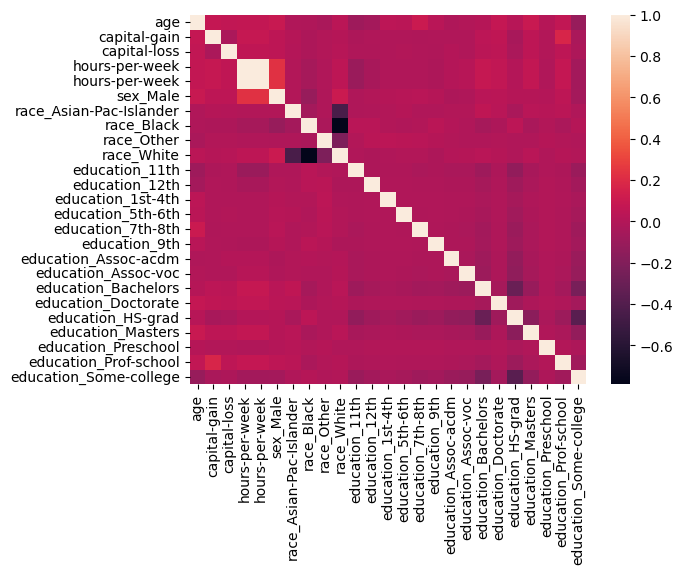

In [40]:
plt.figure()
sns.heatmap(df_dummies.corr())
plt.show()
plt.close()

4. Create output variable y which is binary, 0 when income is less than 50k, 1 when it is greather than 50k

In [58]:
y = np.where(df.income=='<=50K', 0, 1)

### Logistic Regression Models and Evaluation

5. Using x_train, x_test, y_train, y_test, fit a logistic regression model in scikit-learn on the training set with parameters:
- C=0.05
- penalty='l1'
- solver='liblinear'

In [59]:
# Split data into a train and test set
x_train, x_test, y_train, y_test = train_test_split(df_dummies, y, random_state=1, test_size=.2)

In [60]:
# Fit LR model with sklearn on train set, and predicting on the test set
log_reg = LogisticRegression(C=0.05, penalty='l1', solver='liblinear')
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)

6. Print the model parameters (intercept and coefficients).


In [65]:
print('Model parameter, intercept: ')
print(log_reg.intercept_[0])
print('Model parameter, coeff: ')
print(log_reg.coef_)

Model parameter, intercept: 
-5.649086101182012
Model parameter, coeff: 
[[ 3.70417832e-02  3.15038166e-04  6.66874062e-04  1.82459529e-02
   1.41713281e-02  1.03455361e+00  0.00000000e+00 -3.24799444e-01
   0.00000000e+00  1.10429837e-01 -5.71159455e-01  0.00000000e+00
   0.00000000e+00 -3.98035793e-01 -8.96881700e-01 -5.00342425e-01
   5.77106750e-01  5.51588174e-01  1.28804843e+00  1.80128744e+00
   0.00000000e+00  1.60337634e+00  0.00000000e+00  1.82665805e+00
   3.89520039e-01]]


7. Evaluate the predictions of the model on the test set. 
Print the confusion matrix and accuracy score.

In [72]:
print('Confusion matrix on test set: ')
print(confusion_matrix(y_test, y_pred))
print(f'The accuracy score on on test set: {log_reg.score(x_test, y_test)}')

Confusion matrix on test set: 
[[4772  254]
 [ 880  607]]
The accuracy score on on test set: 0.8258866881621373


8. Create new DataFrame of the model coefficients and variable names; sort values based on coefficient

In [75]:
coef_df = pd.DataFrame(zip(x_train.columns, log_reg.coef_[0]),
                       columns=['var', 'coef']).sort_values('coef')
coef_df = coef_df[coef_df.coef.abs()>0].sort_values('coef')
coef_df

,var,coef
14,education_7th-8th,-0.896882
10,education_11th,-0.571159
15,education_9th,-0.500342
13,education_5th-6th,-0.398036
7,race_Black,-0.324799
1,capital-gain,0.000315
2,capital-loss,0.000667
4,hours-per-week,0.014171
3,hours-per-week,0.018246
0,age,0.037042


9. barplot of the coefficients sorted in ascending order

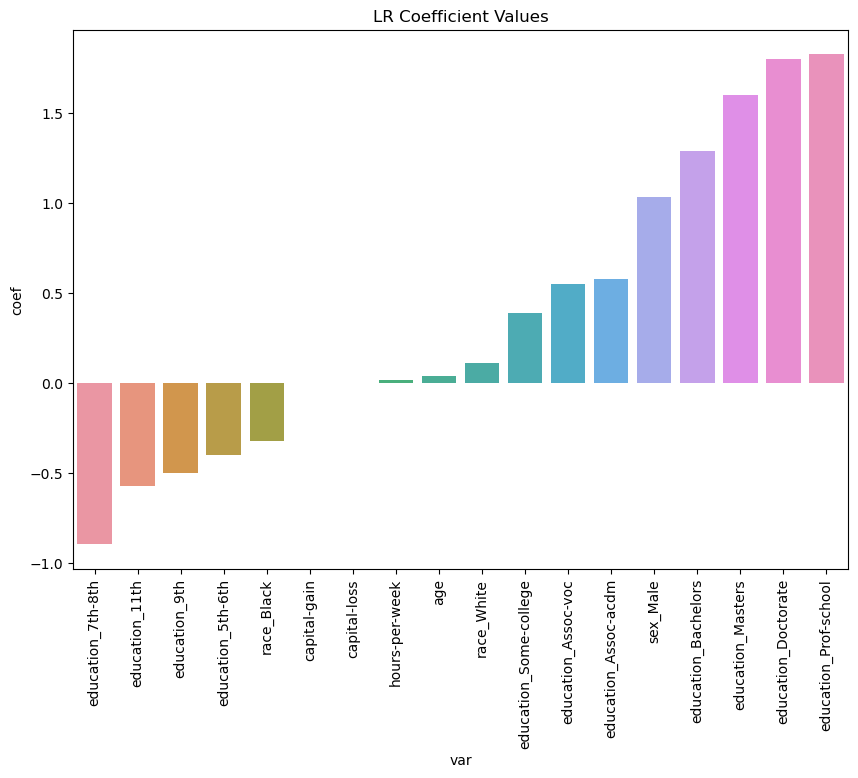

<function matplotlib.pyplot.close(fig=None)>

In [76]:
plt.figure(figsize=(10,7))
sns.barplot(data=coef_df, x = 'var', y = 'coef')
plt.xticks(rotation=90)
plt.title('LR Coefficient Values')
plt.show()
plt.close

Plot the ROC curve and print the AUC value.

ROC AUC score: 0.8457456331313886


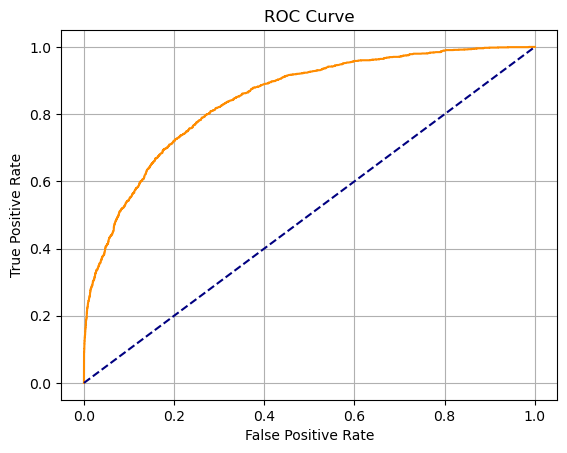

In [77]:
y_pred_prob = log_reg.predict_proba(x_test)
roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])
print(f'ROC AUC score: {roc_auc}')

fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob[:,1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,1],[0,1], color='navy',linestyle='--')
plt.title('ROC Curve')
plt.grid()
plt.show()